# NLP Chatbot

## Domain:
Industrial safety. NLP based Chatbot.

## Context:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

## Data Description:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.
Columns description:
‣ Data: timestamp or time/date information
‣ Countries: which country the accident occurred (anonymised)
‣ Local: the city where the manufacturing plant is located (anonymised)
‣ Industry sector: which sector the plant belongs to
‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)
‣ Genre: if the person is male of female
‣ Employee or Third Party: if the injured person is an employee or a third party
‣ Critical Risk: some description of the risk involved in the accident
‣ Description: Detailed description of how the accident happened.
Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database [ for your reference only ]

## Project Objective:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

# Industrial safety. NLP based Chatbot.

## PROJECT TASK:

## Milestone 1:

### Input: Interim report

### Process:

### Step 1: Import the data

In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import re
import string
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize,stem
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import np_utils
from keras.layers import Input
from keras.layers.merge import Concatenate
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Data** **Import**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
data_URL = '/content/drive/MyDrive/archive (1)/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv'

In [5]:
df = pd.read_csv(data_URL)

In [6]:
df.head(5)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


### Step 2: Data cleansing

In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.rename(columns={'Data':'Date', 'Genre':'Gender'}, inplace=True)
df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [8]:
df.shape

(425, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Countries                 425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [10]:
df['Date'].value_counts()

2017-02-08 00:00:00    6
2016-06-16 00:00:00    5
2016-10-03 00:00:00    4
2017-06-11 00:00:00    4
2016-06-08 00:00:00    4
                      ..
2016-07-18 00:00:00    1
2016-07-20 00:00:00    1
2016-07-21 00:00:00    1
2016-07-23 00:00:00    1
2017-07-09 00:00:00    1
Name: Date, Length: 287, dtype: int64

In [11]:
df['Countries'].value_counts()

Country_01    251
Country_02    130
Country_03     44
Name: Countries, dtype: int64

In [12]:
df['Local'].value_counts()

Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64

In [13]:
df['Industry Sector'].value_counts()

Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64

In [14]:
df['Accident Level'].value_counts()

I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

In [15]:
df['Potential Accident Level'].value_counts()

IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64

In [16]:
df['Gender'].value_counts()

Male      403
Female     22
Name: Gender, dtype: int64

In [17]:
df['Employee or Third Party'].value_counts()

Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee or Third Party, dtype: int64

In [18]:
df['Critical Risk'].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Projection of fragments                        2
Machine Protection  

In [19]:
from sklearn.preprocessing import LabelEncoder
local_replace = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
df['Local'] = df['Local'].map(local_replace)
le = LabelEncoder()
df['Accident Level'] = le.fit_transform(df['Accident Level'])
df['Potential Accident Level'] = le.fit_transform(df['Potential Accident Level'])
del local_replace

In [20]:
df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [21]:
df.isnull().sum()

Date                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [22]:
df.duplicated().sum()

7

In [23]:
# Delete duplicate rows
df.drop_duplicates(inplace=True)

In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1


In [25]:
Month = {
    
    1   :  'January',
    2   :  'February',
    3   :  'March',
    4   :  'April',
    5   :  'May',
    6   :  'June',
    7   :  'July',
    8   :  'August',
    9   :  'September',
    10  :  'October',
    11  :  'November',
    12  :  'December'
    
}

In [26]:
df['Month'] = df['Month'].map(Month)

In [27]:
df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,January
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,January
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,January
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,January
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,January


In [28]:
df['Critical Risk']=df['Critical Risk'].replace('\nNot applicable','Not applicable')

**only one column has unclean data**

In [29]:
df['Critical Risk'].value_counts()

Others                                       229
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Cut                                           14
Venomous Animals                              13
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Machine Protection                             2
Electrical Shock    

In [30]:
columns = df[df.columns[~df.columns.isin(['Description', 'Date'])]].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{df[cols].unique()}\n')

Unique values for Countries is 
['Country_01' 'Country_02' 'Country_03']

Unique values for Local is 
[ 1  2  3  4  5  6  7  8 10  9 11 12]

Unique values for Industry Sector is 
['Mining' 'Metals' 'Others']

Unique values for Accident Level is 
[0 3 2 1 4]

Unique values for Potential Accident Level is 
[3 2 0 1 4 5]

Unique values for Gender is 
['Male' 'Female']

Unique values for Employee or Third Party is 
['Third Party' 'Employee' 'Third Party (Remote)']

Unique values for Critical Risk is 
['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' 'Not applicable' 'Traffic' 'Projection'
 'Venomous Animals' 'Plates' 'Projection/Burning' 'remains of choco'
 'Vehicles and Mobile Equipment' 'Projection/Choco' 'Machine Protection'

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Countries                 418 non-null    object        
 2   Local                     418 non-null    int64         
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    int64         
 5   Potential Accident Level  418 non-null    int64         
 6   Gender                    418 non-null    object        
 7   Employee or Third Party   418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
 10  Year                      418 non-null    int64         
 11  Month                     418 non-null    object        
dtypes: datetime64[ns](1), 

### Data Visualisation
### Univariate Analysis

#### Countries

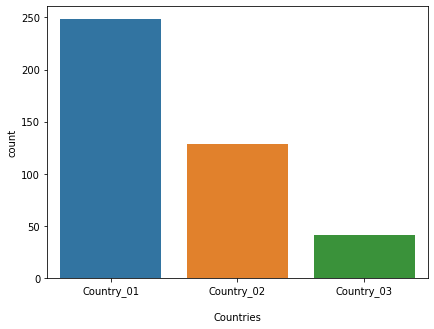

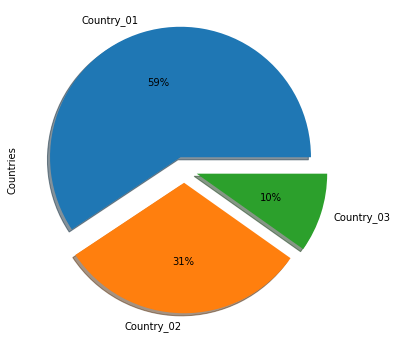

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['Countries']);
plt.xlabel("\nCountries")

plt.figure(figsize=(6,6))
df['Countries'].value_counts().plot.pie(shadow=True,autopct='%1.f%%', explode=(0.1,0.1,0.1))

**The most affected country from the above dataset is country_01 with around 59% of the accidents with the count of 250**

#### Local

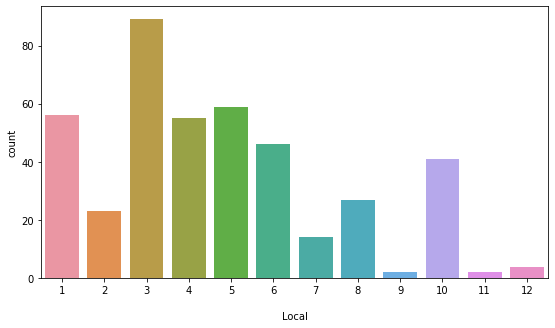

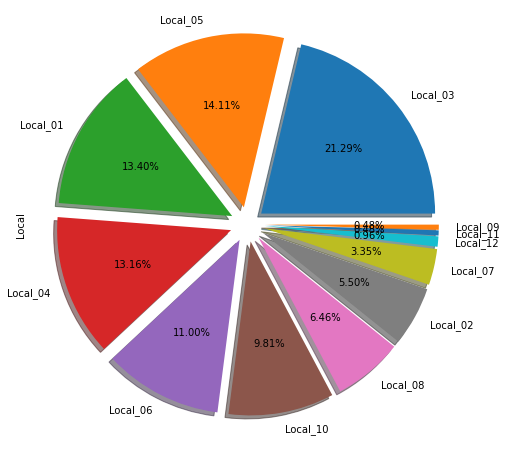

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Local']);
plt.xlabel("\nLocal")



plt.figure(figsize=(8,8))
df['Local'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%', labels=['Local_03','Local_05','Local_01','Local_04','Local_06','Local_10',
                                                'Local_08','Local_02','Local_07','Local_12','Local_11','Local_09'],  explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1));

**Most accidents happened in Local_03 .Its count is 90 ,which is equivalent to 21.18%.**
**The second Most Accident happens in local_5 which is equivalent to 13.88%.**

#### Industry Sector

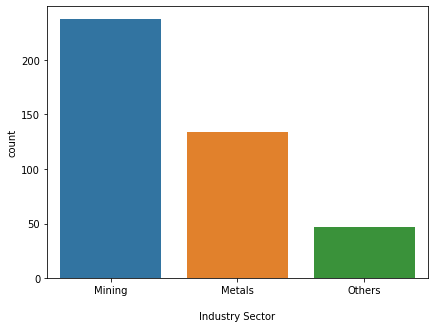

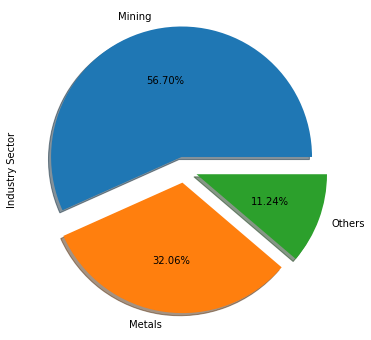

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Industry Sector']);
plt.xlabel("\nIndustry Sector")



plt.figure(figsize=(6,6))
df['Industry Sector'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',  explode=(0.1,0.1,0.1));

**Mostly affected sector is Mining sector. 56.71% of accidents occur in Mining sector.**



#### Gender

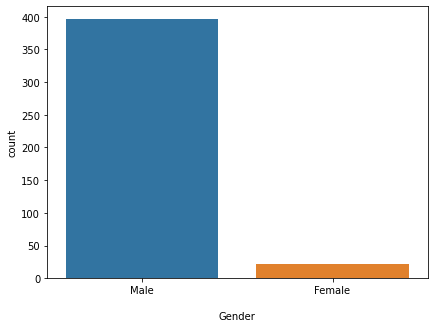

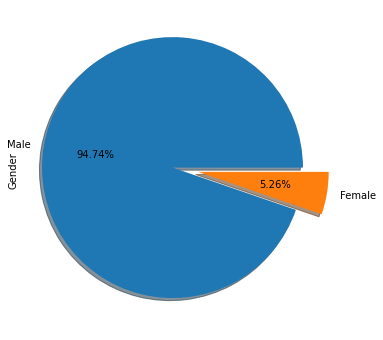

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Gender']);
plt.xlabel("\nGender")



plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',  explode=(0.1,0.1));

**Most affected workers in accidents are male .Their count is 403 ,which is equivalent to 94.82%**

#### Accident Level

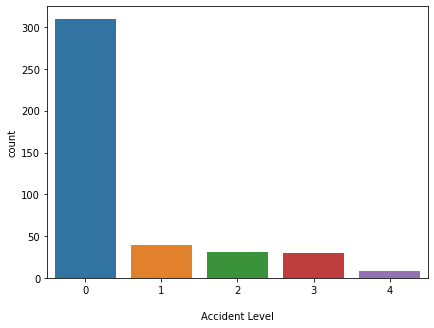

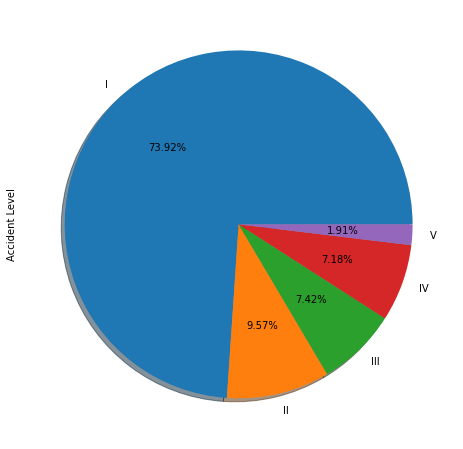

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Accident Level']);
plt.xlabel("\nAccident Level")



plt.figure(figsize=(8,8))
df['Accident Level'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',labels=['I', 'II', 'III' ,'IV' ,'V']);

**Most accidents belongs to "Accident Level - I" .Its count is 316 which is equivalent to 74.35%% of total accidents.**

#### Potential Accident Level

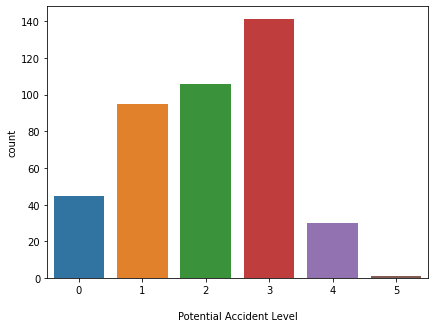

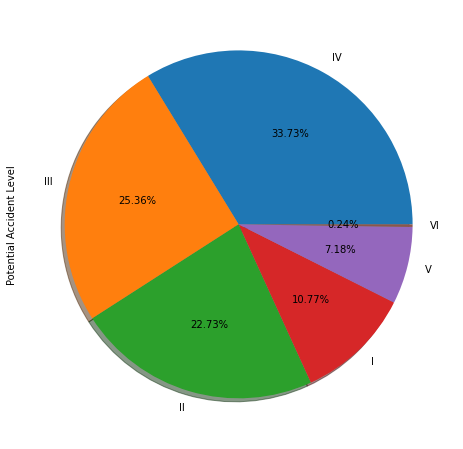

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Potential Accident Level']);
plt.xlabel("\nPotential Accident Level")



plt.figure(figsize=(8,8))
df['Potential Accident Level'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',labels=['IV','III','II','I','V','VI']);

**Most "Potential Accident Level" belongs to level IV .Its count is 143 which is equivalent to 33.65% of total potential accidents.**

#### Employee or Third Party

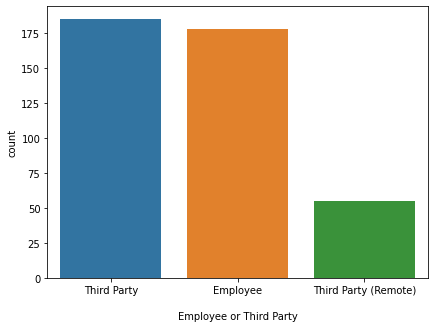

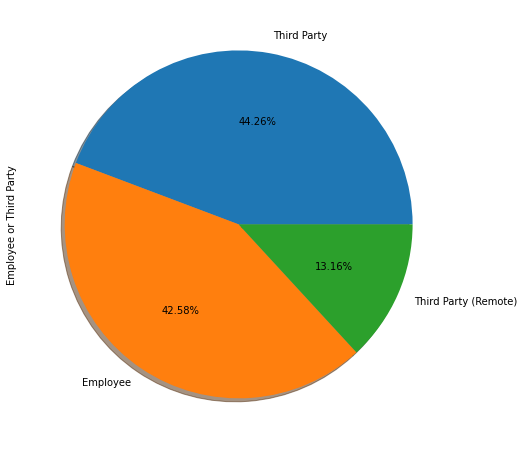

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Employee or Third Party']);
plt.xlabel("\nEmployee or Third Party")



plt.figure(figsize=(8,8))
df['Employee or Third Party'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%');

**Most affected Employee type are Third party workers .Their count is 189 ,which is equivalent to 44.47%.**

#### Year

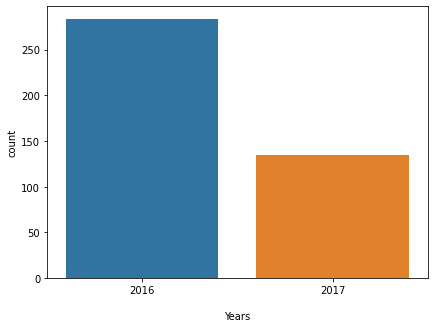

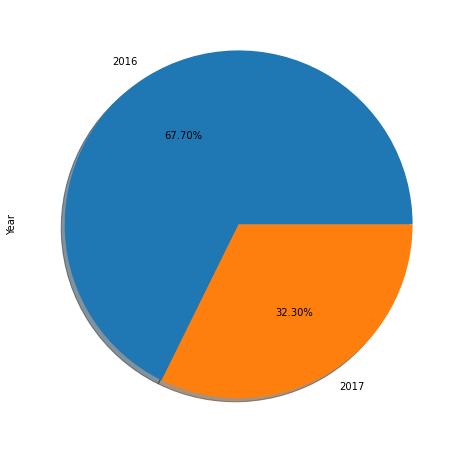

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Year']);
plt.xlabel("\nYears")



plt.figure(figsize=(8,8))
df['Year'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%');

**Most accidents happend in year 2016.Count is 285 ,which is equivalent to 67.06% .**

#### Month

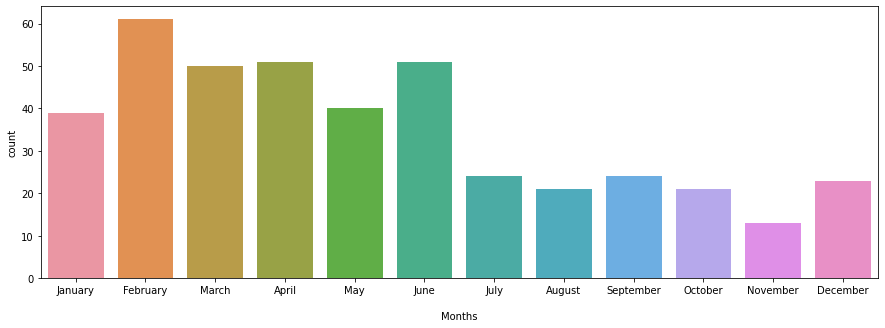

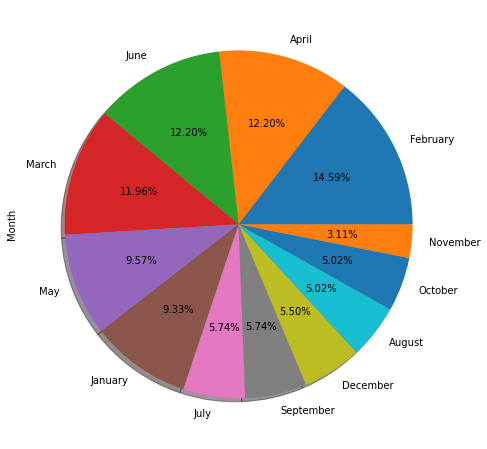

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Month']);
plt.xlabel("\nMonths")



plt.figure(figsize=(8,8))
df['Month'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%');

**Most accidents happend in Feb month.Count is 61 ,which is equivalent to 14.35%**

### Bivariate Analysis

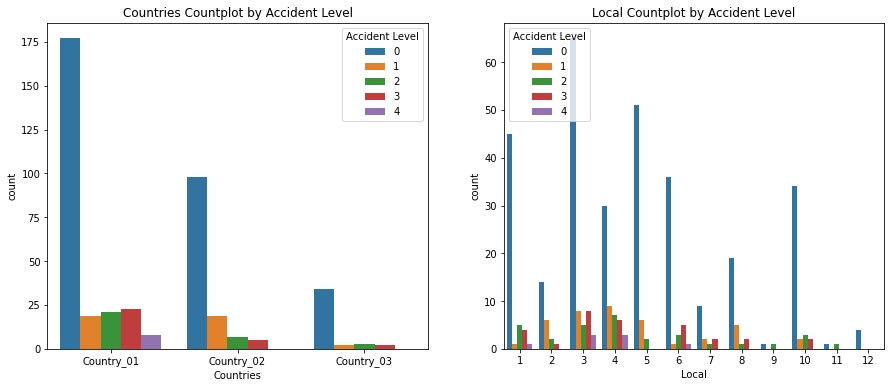

In [41]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Countries Countplot by Accident Level')
sns.countplot(x='Countries',hue='Accident Level' , data=df );
plt.subplot(1,2,2)
plt.title('Local Countplot by Accident Level')
sns.countplot(x='Local',hue='Accident Level' , data=df);

plt.show()

#### Country Vs Accident Level
- Accident level I is highest in all countries.                   
- Most accidents happened in Country_01.
- Accident level in Country_03 is lesser than other countries.

#### Local Vs Accident Level
- Accident level I is highest in almost all localities.
- Accident level I is highest in Local 3.
- Local 9,11 and 12 have less accidents level.

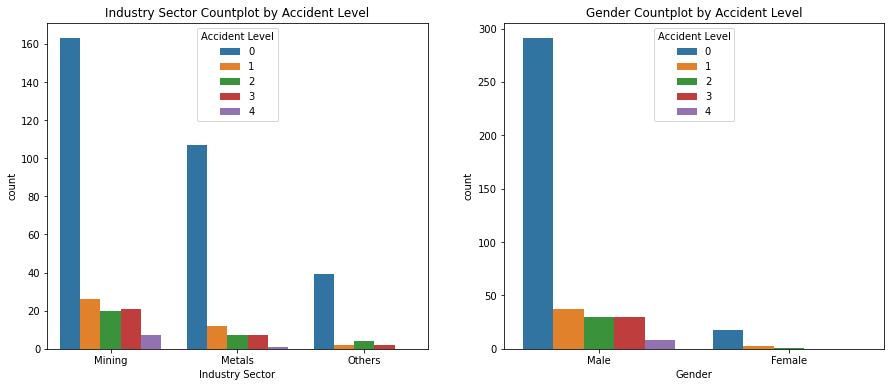

In [42]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Industry Sector Countplot by Accident Level')
sns.countplot(x='Industry Sector',hue='Accident Level' , data=df );
plt.subplot(1,2,2)
plt.title('Gender Countplot by Accident Level')
sns.countplot(x='Gender',hue='Accident Level' , data=df);

plt.show()

#### Industry Sector Vs Accident Level
- Accident level I is highest in all industry sector (Mining, Metals and Other).
- Most accidents happened in Mining industry sector.
- After Accident Level I ,Level II is Highest among al the Industries.
- There are very few cases for Accident level 5.

#### Gender Vs Accident Level
- Accident level I is highest among the Gender.
- Most accidents happened with male ones.
- There are very few cases With Females.


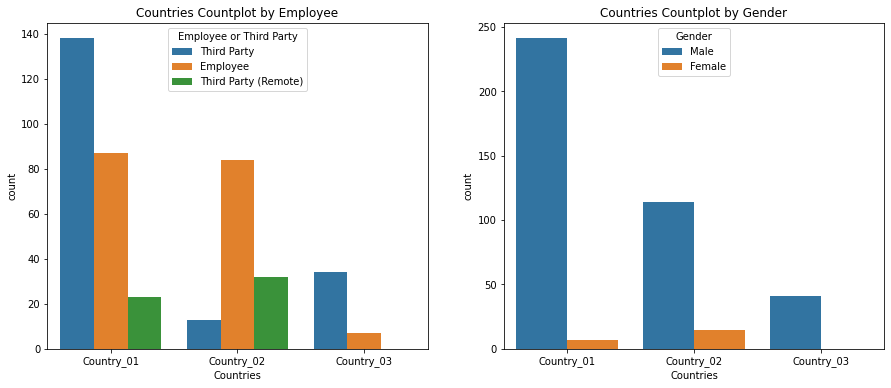

In [43]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Countries Countplot by Employee')
sns.countplot(x="Countries", data=df, hue="Employee or Third Party");
plt.subplot(1,2,2)
plt.title('Countries Countplot by Gender')
sns.countplot(x="Countries", data=df, hue="Gender");

#### Country vs Employee
- Country_01 is highest No. of injuries
- Most accidents happened with Third Party .
- In Country_02 the most effected ones are Employee
- Country_03 has Less injuries as compared to other Countries

#### Country Vs Gender
- Country_01 is highest No. of injuries
- Most accidents happened with Males.
- In all Countries the males are Getting effected more .
- Country_03 has not even single Females 

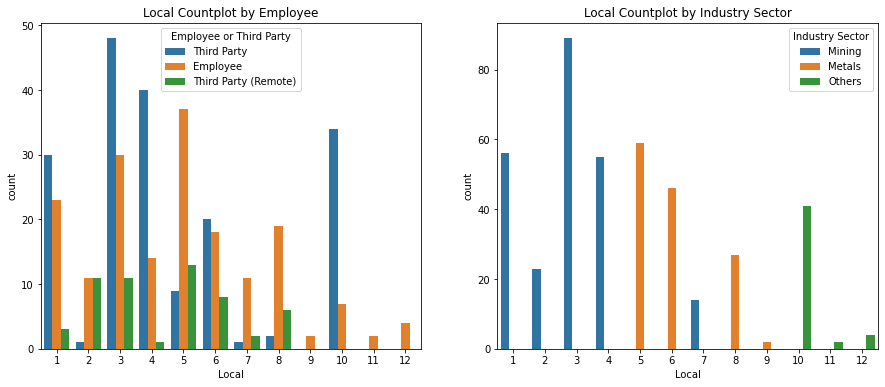

In [44]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Local Countplot by Employee')
sns.countplot(x="Local", data=df, hue="Employee or Third Party");
plt.subplot(1,2,2)
plt.title('Local Countplot by Industry Sector')
sns.countplot(x="Local", data=df, hue="Industry Sector");

#### Local Vs Employees 

- Local 3 has highest no of Third Party employees
- Local 3 has more employees than other localities.
- Local 10,11 don't have Third Party (Remote) employees.
- Local 8,10,11 don't have Employee and Third Party employees.

#### Local Vs Industry Sector 

- Local 3 has highest number of Mining industry sector.
- Local 5 has highest number of Metals industry sector.
- Local 1,2,3,4,7 has Mining industry sector.
- Local 5,6,7,8 has Metals industry sector.
- Local 10,11,12 has Others industry sector.

### Step 3: Data preprocessing

In [45]:
df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,January
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,January
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,January
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,January
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,January


#### Lower Case

In [46]:
df['Processed_Description'] = df['Description'].str.lower()
df['Processed_Description']

0      while removing the drill rod of the jumbo 08 f...
1      during the activation of a sodium sulphide pum...
2      in the sub-station milpo located at level +170...
3      being 9:45 am. approximately in the nv. 1880 c...
4      approximately at 11:45 a.m. in circumstances t...
                             ...                        
420    being approximately 5:00 a.m. approximately, w...
421    the collaborator moved from the infrastructure...
422    during the environmental monitoring activity i...
423    the employee performed the activity of strippi...
424    at 10:00 a.m., when the assistant cleaned the ...
Name: Processed_Description, Length: 418, dtype: object

 #### Expand Contractions

In [47]:
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews
df['Processed_Description']=df['Processed_Description'].apply(lambda x:expand_contractions(x))

In [48]:
df['Processed_Description']

0      while removing the drill rod of the jumbo 08 f...
1      during the activation of a sodium sulphide pum...
2      in the sub-station milpo located at level +170...
3      being 9:45 am. approximately in the nv. 1880 c...
4      approximately at 11:45 a.m. in circumstances t...
                             ...                        
420    being approximately 5:00 a.m. approximately, w...
421    the collaborator moved from the infrastructure...
422    during the environmental monitoring activity i...
423    the employee performed the activity of strippi...
424    at 10:00 a.m., when the assistant cleaned the ...
Name: Processed_Description, Length: 418, dtype: object

#### Remove punctuations

In [49]:
df['Processed_Description'] = df['Processed_Description'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [50]:
df['Processed_Description']

0      while removing the drill rod of the jumbo 08 f...
1      during the activation of a sodium sulphide pum...
2      in the substation milpo located at level 170 w...
3      being 945 am approximately in the nv 1880 cx69...
4      approximately at 1145 am in circumstances that...
                             ...                        
420    being approximately 500 am approximately when ...
421    the collaborator moved from the infrastructure...
422    during the environmental monitoring activity i...
423    the employee performed the activity of strippi...
424    at 1000 am when the assistant cleaned the floo...
Name: Processed_Description, Length: 418, dtype: object

#### Remove Stopwords

In [51]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['Processed_Description'] = df['Processed_Description'].apply(lambda x: remove_stopwords(x))

In [52]:
df['Processed_Description']

0      removing drill rod jumbo 08 maintenance superv...
1      activation sodium sulphide pump piping uncoupl...
2      substation milpo located level 170 collaborato...
3      945 approximately nv 1880 cx695 ob7 personnel ...
4      approximately 1145 circumstances mechanics ant...
                             ...                        
420    approximately 500 approximately lifting kelly ...
421    collaborator moved infrastructure office julio...
422    environmental monitoring activity area employe...
423    employee performed activity stripping cathodes...
424    1000 assistant cleaned floor module e central ...
Name: Processed_Description, Length: 418, dtype: object

####  Lemmatization

In [53]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [54]:
#lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df['Processed_Description'] = df['Processed_Description'].apply(lambda text: lemmatize_words(text))

In [55]:
df['Processed_Description']

0      removing drill rod jumbo 08 maintenance superv...
1      activation sodium sulphide pump piping uncoupl...
2      substation milpo located level 170 collaborato...
3      945 approximately nv 1880 cx695 ob7 personnel ...
4      approximately 1145 circumstance mechanic antho...
                             ...                        
420    approximately 500 approximately lifting kelly ...
421    collaborator moved infrastructure office julio...
422    environmental monitoring activity area employe...
423    employee performed activity stripping cathode ...
424    1000 assistant cleaned floor module e central ...
Name: Processed_Description, Length: 418, dtype: object

#### Remove Extra Spaces

In [56]:
df['Processed_Description'] = df['Processed_Description'].apply(lambda text: re.sub(' +', ' ', text))

In [57]:
df['Processed_Description']

0      removing drill rod jumbo 08 maintenance superv...
1      activation sodium sulphide pump piping uncoupl...
2      substation milpo located level 170 collaborato...
3      945 approximately nv 1880 cx695 ob7 personnel ...
4      approximately 1145 circumstance mechanic antho...
                             ...                        
420    approximately 500 approximately lifting kelly ...
421    collaborator moved infrastructure office julio...
422    environmental monitoring activity area employe...
423    employee performed activity stripping cathode ...
424    1000 assistant cleaned floor module e central ...
Name: Processed_Description, Length: 418, dtype: object

#### Tokenization and keeping alphabets

In [58]:
#defining function for tokenization
stop=set(stopwords.words('english'))
import re
def tokenization(text):
  c=[]
  for desc in text:
    words=[w for w in word_tokenize(desc) if (w not in stop)]
    words = [word for word in words if word.isalpha()]
    c.append(words)
  return c 

In [59]:
df['Processed_Description']= tokenization(df['Processed_Description'])

In [60]:
df['Processed_Description']

0      [removing, drill, rod, jumbo, maintenance, sup...
1      [activation, sodium, sulphide, pump, piping, u...
2      [substation, milpo, located, level, collaborat...
3      [approximately, nv, personnel, begin, task, un...
4      [approximately, circumstance, mechanic, anthon...
                             ...                        
420    [approximately, approximately, lifting, kelly,...
421    [collaborator, moved, infrastructure, office, ...
422    [environmental, monitoring, activity, area, em...
423    [employee, performed, activity, stripping, cat...
424    [assistant, cleaned, floor, module, e, central...
Name: Processed_Description, Length: 418, dtype: object

#### Maximum length of the sentence

In [61]:
leng = []
for i in df['Processed_Description']:
  leng.append(len(i))
print('Maximum length of the sentence in processed description :',max(leng))

Maximum length of the sentence in processed description : 93


#### Processing the description

In [62]:
desc_processed = []
desc_processed = [' '.join(i) for i in df.Processed_Description]

In [63]:
df['Processed_Description_Final'] = desc_processed

In [64]:
df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Processed_Description,Processed_Description_Final
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,January,"[removing, drill, rod, jumbo, maintenance, sup...",removing drill rod jumbo maintenance superviso...
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,January,"[activation, sodium, sulphide, pump, piping, u...",activation sodium sulphide pump piping uncoupl...
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,January,"[substation, milpo, located, level, collaborat...",substation milpo located level collaborator ex...
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,January,"[approximately, nv, personnel, begin, task, un...",approximately nv personnel begin task unlockin...
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,January,"[approximately, circumstance, mechanic, anthon...",approximately circumstance mechanic anthony gr...


#### Word Cloud

In [65]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

(-0.5, 399.5, 199.5, -0.5)

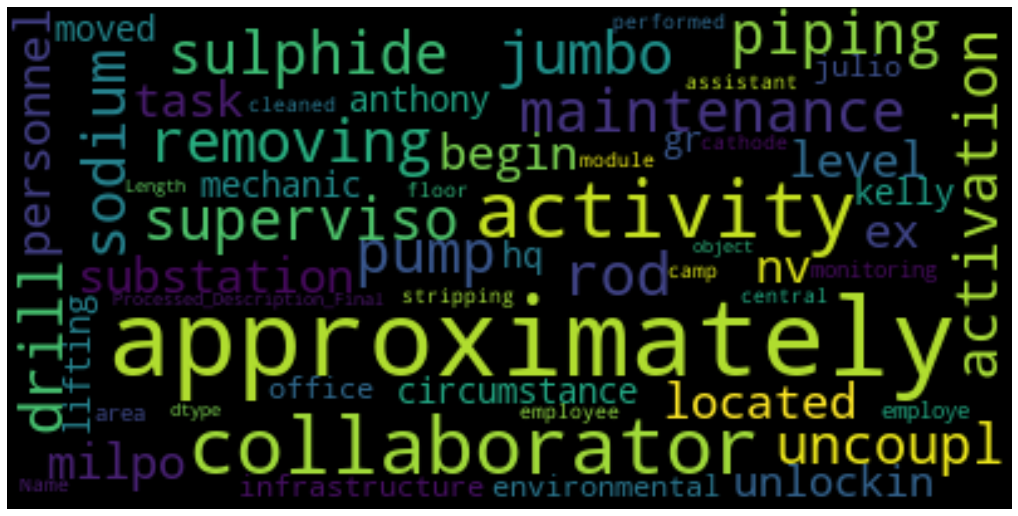

In [66]:
stopwords = set(STOPWORDS)

# Generate a word cloud image
desc = df['Processed_Description_Final']
wordcloud = WordCloud(stopwords = stopwords, background_color = "black").generate(str(desc))

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = [18, 18])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

### Step 4: Data preparation to be used for AIML model learning

In [67]:
df
df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Year,Month,Processed_Description,Processed_Description_Final
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,January,"[removing, drill, rod, jumbo, maintenance, sup...",removing drill rod jumbo maintenance superviso...
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,January,"[activation, sodium, sulphide, pump, piping, u...",activation sodium sulphide pump piping uncoupl...
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,January,"[substation, milpo, located, level, collaborat...",substation milpo located level collaborator ex...
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,January,"[approximately, nv, personnel, begin, task, un...",approximately nv personnel begin task unlockin...
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,January,"[approximately, circumstance, mechanic, anthon...",approximately circumstance mechanic anthony gr...


In [68]:
df.drop(columns=['Description','Processed_Description'],axis=1,inplace=True)

In [69]:
df

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Year,Month,Processed_Description_Final
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,2016,January,removing drill rod jumbo maintenance superviso...
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,2016,January,activation sodium sulphide pump piping uncoupl...
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,2016,January,substation milpo located level collaborator ex...
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,2016,January,approximately nv personnel begin task unlockin...
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,2016,January,approximately circumstance mechanic anthony gr...
...,...,...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04,Country_01,4,Mining,0,2,Male,Third Party,Others,2017,July,approximately approximately lifting kelly hq t...
421,2017-07-04,Country_01,3,Mining,0,1,Female,Employee,Others,2017,July,collaborator moved infrastructure office julio...
422,2017-07-05,Country_02,9,Metals,0,1,Male,Employee,Venomous Animals,2017,July,environmental monitoring activity area employe...
423,2017-07-06,Country_02,5,Metals,0,1,Male,Employee,Cut,2017,July,employee performed activity stripping cathode ...


#### Export Clean Data to CSV

In [70]:
df.to_csv('/content/drive/MyDrive/archive (1)/IHMStefanini_industrial_safety_and_health_database_with_accidents_description_Cleaned.csv')

#### Getting Target variable

In [71]:
X= df['Processed_Description_Final']

In [72]:
y = df['Accident Level']

#### Split data into train and test.

In [73]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size = 0.2)

In [74]:
print(X_train.shape)
print(y_train.shape)

(334,)
(334,)


In [75]:
print(X_test.shape)
print(y_test.shape)

(84,)
(84,)


In [76]:
X_test

324    performing carpentry work collaborator hit sec...
327    maintenance peristaltic pump change internal h...
394    hour end concentrate truck cleaning driver ins...
56     circumstance operator going level level notice...
154    approximately pm operator paulo operator filte...
                             ...                        
57     installing ripper pin tractor ripper support a...
127    test soft starter engine belt collaborator igo...
24     operator deslaminadora section unlocking sheet...
17     due overheating bar row cell spark produced pr...
66     carrying activity cutting electrowelded mesh w...
Name: Processed_Description_Final, Length: 84, dtype: object

In [77]:
y_test

324    0
327    2
394    3
56     0
154    3
      ..
57     0
127    1
24     0
17     0
66     0
Name: Accident Level, Length: 84, dtype: int64

#### Vectorize data using any one vectorizer.

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [79]:
vectorizer.get_feature_names()[:5]

['abdomen', 'abdomen left', 'able', 'able position', 'able remove']

#### View term-document matrix

In [80]:
X_train_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### Build classifier Models.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

def build_model_train(X_train, y_train, X_test, y_test):
  models = {
        'LogReg': LogisticRegression(C=1.0, penalty='l1', dual=False, solver='liblinear'), 
        'SVM': SVC(), 
      }
  modelnames = []
  accuracyscorestrain = []
  accuracyscorestest = []
  f1scorestrain_values = []
  f1scorestest_values = []
  recallscorestrain_values = []
  recallscorestest_values = []
  precisionscorestest_values = []
  precisionscorestrain_values = []
  for modelname, model in models.items():
    clf = model.fit(X_train, y_train) 
    result_test = clf.score(X_test,y_test) 
    result_train = clf.score(X_train,y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    modelnames.append(modelname)
    accuracyscorestest.append(result_test)
    accuracyscorestrain.append(result_train)
    f1scorestest_values.append(f1_score(y_test, y_pred_test, average='macro'))
    f1scorestrain_values.append(f1_score(y_train, y_pred_train, average='macro'))
    recallscorestrain_values.append(recall_score(y_train, y_pred_train, average='macro'))
    recallscorestest_values.append(recall_score(y_test, y_pred_test, average='macro'))
    precisionscorestrain_values.append(precision_score(y_train, y_pred_train, average='macro'))
    precisionscorestest_values.append(precision_score(y_test, y_pred_test, average='macro'))
    result_df =  pd.DataFrame({'Model': modelnames, 'Accuracy score Train': accuracyscorestrain, 'Accuracy score Test': accuracyscorestest,
                               'Train F1 Score': f1scorestrain_values,
                               'Test F1 Score': f1scorestest_values,                         
                               'Train Recall': recallscorestrain_values,
                               'Test Recall': recallscorestest_values,
                               'Train Precision': precisionscorestrain_values,                              
                               'Test Precision': precisionscorestest_values,
                          })
      
  return result_df

In [82]:
build_model_train(X_train_bow.toarray(),y_train,X_test_bow.toarray(),y_test)

,Model,Accuracy score Train,Accuracy score Test,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,LogReg,0.916168,0.714286,0.786771,0.217376,0.693760,0.237302,0.979562,0.201282
1,SVM,0.841317,0.750000,0.623708,0.171429,0.519626,0.200000,0.964548,0.150000


**SVM model performs better because it is not overfitting and it also gives better accuracy than Logistic Regression**

#### Using Logistic Regression Model

In [83]:
# instantiating the model
log_reg = LogisticRegression(C=1.0, penalty='l1', dual=False, solver='liblinear')

# fitting the model
log_reg.fit(X_train_bow.toarray(), y_train)

# score on unseen data
accuracy_test = log_reg.score(X_test_bow.toarray(),y_test)
accuracy_train = log_reg.score(X_train_bow.toarray(),y_train)
print(accuracy_test*100)
print(accuracy_train*100)

71.42857142857143
91.61676646706587


In [84]:
# prediction using test data
y_pred_test = log_reg.predict(X_test_bow.toarray())

from sklearn import metrics
# generating classification report of actual and predicted values
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        63
           1       0.00      0.00      0.00         8
           2       0.25      0.25      0.25         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.20      0.24      0.22        84
weighted avg       0.58      0.71      0.64        84



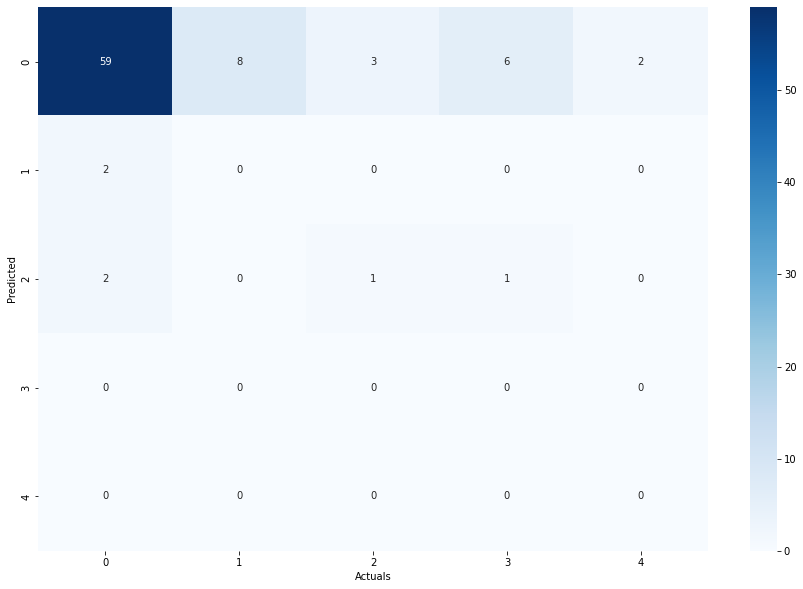

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(y_pred_test,y_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

In [86]:
# prediction using train data
y_pred_train = log_reg.predict(X_train_bow.toarray())

from sklearn import metrics
# generating classification report of actual and predicted values
print(metrics.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       246
           1       1.00      0.62      0.77        32
           2       1.00      0.81      0.90        27
           3       1.00      0.70      0.82        23
           4       1.00      0.33      0.50         6

    accuracy                           0.92       334
   macro avg       0.98      0.69      0.79       334
weighted avg       0.92      0.92      0.91       334



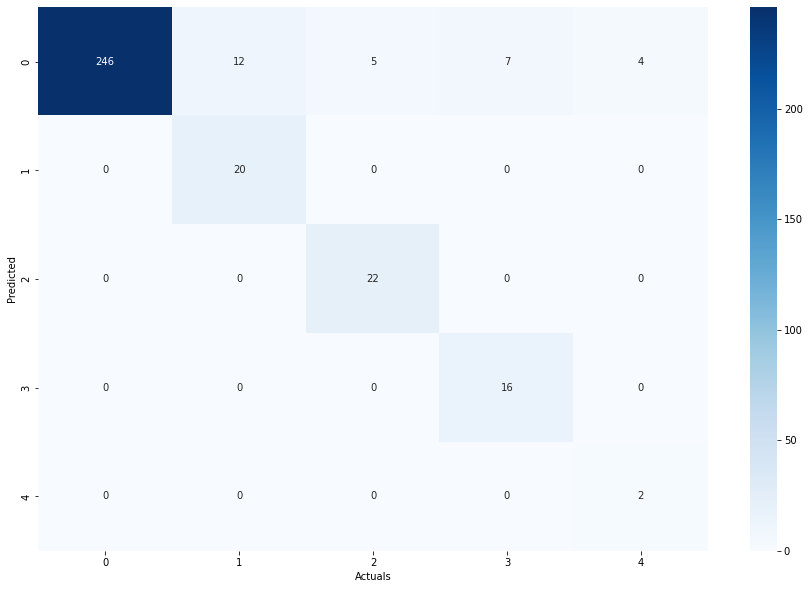

In [87]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(y_pred_train,y_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

In [88]:
scores_df = pd.DataFrame({ 'Model' : 'Logistic Regression',  'Accuracy_Train' : [accuracy_train*100], 'Accuracy_Test' : [accuracy_test*100], 'Test F1 Score': f1_score(y_test, y_pred_test, average='micro'), 
                          'Train F1 Score': f1_score(y_train, y_pred_train, average='macro'),
                          'Test Recall': recall_score(y_test, y_pred_test, average='macro'),
                          'Train Recall': recall_score(y_train, y_pred_train, average='macro'),
                          'Test Precision': precision_score(y_test, y_pred_test, average='macro'),
                          'Train Precision': precision_score(y_train, y_pred_train, average='macro')})
scores_df

,Model,Accuracy_Train,Accuracy_Test,Test F1 Score,Train F1 Score,Test Recall,Train Recall,Test Precision,Train Precision
0,Logistic Regression,91.616766,71.428571,0.714286,0.786771,0.237302,0.69376,0.201282,0.979562


#### Using SVM Model

In [89]:
# instantiating the model
svm = SVC()

# fitting the model
svm.fit(X_train_bow.toarray(), y_train)

# score on unseen data
accuracy_test = svm.score(X_test_bow.toarray(),y_test)
accuracy_train = svm.score(X_train_bow.toarray(),y_train)
print(accuracy_test*100)
print(accuracy_train*100)

75.0
84.13173652694611


In [90]:
# prediction using test data
y_pred_test = svm.predict(X_test_bow.toarray())

from sklearn import metrics
# generating classification report of actual and predicted values
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.56      0.75      0.64        84



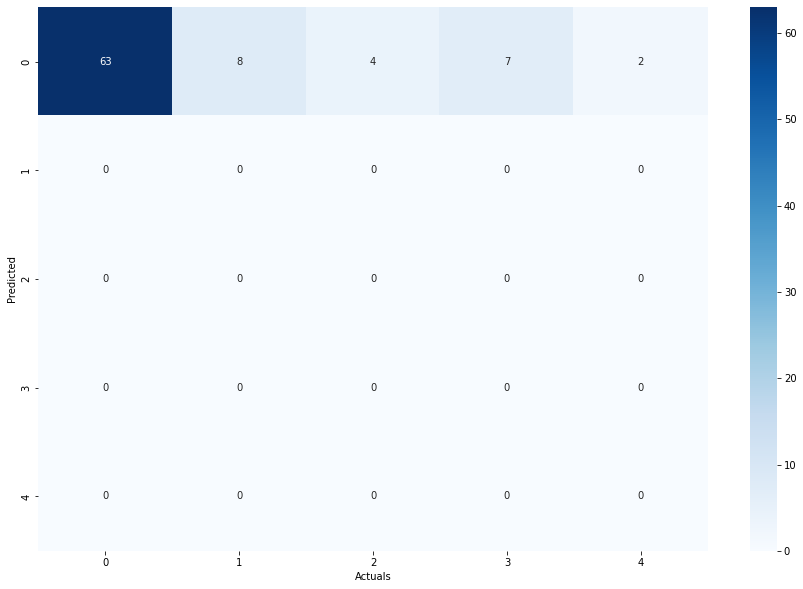

In [91]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(y_pred_test,y_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

In [92]:
# prediction using train data
y_pred_train = svm.predict(X_train_bow.toarray())

from sklearn import metrics
# generating classification report of actual and predicted values
print(metrics.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       246
           1       1.00      0.19      0.32        32
           2       1.00      0.56      0.71        27
           3       1.00      0.52      0.69        23
           4       1.00      0.33      0.50         6

    accuracy                           0.84       334
   macro avg       0.96      0.52      0.62       334
weighted avg       0.87      0.84      0.81       334



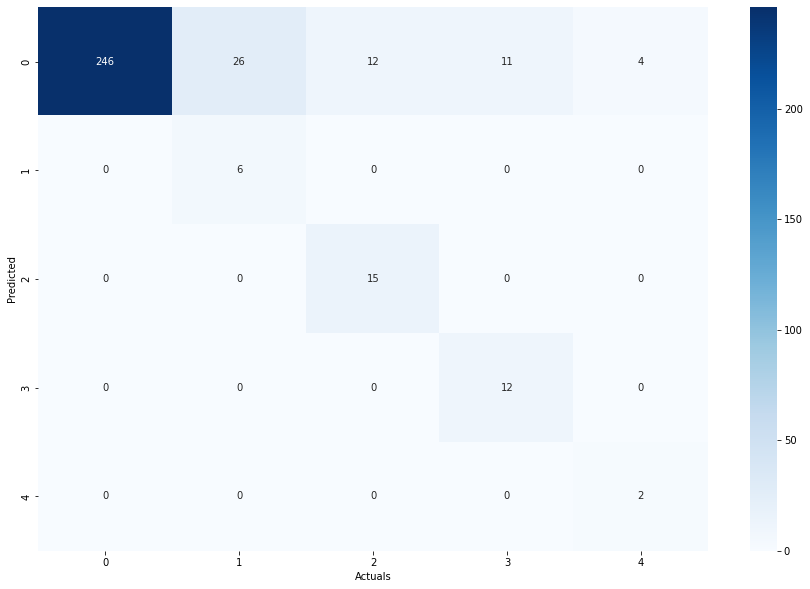

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap((confusion_matrix(y_pred_train,y_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.ylabel('Predicted');
plt.xlabel('Actuals',rotation=0);

In [94]:
tempResultsDf = pd.DataFrame({ 'Model' : 'SVM',  'Accuracy_Train' : [accuracy_train*100], 'Accuracy_Test' : [accuracy_test*100], 'Test F1 Score': f1_score(y_test, y_pred_test, average='micro'), 
                          'Train F1 Score': f1_score(y_train, y_pred_train, average='macro'),
                          'Test Recall': recall_score(y_test, y_pred_test, average='macro'),
                          'Train Recall': recall_score(y_train, y_pred_train, average='macro'),
                          'Test Precision': precision_score(y_test, y_pred_test, average='macro'),
                          'Train Precision': precision_score(y_train, y_pred_train, average='macro')})
scores_df = pd.concat([scores_df, tempResultsDf])
scores_df = scores_df[['Model', 'Accuracy_Train', 'Accuracy_Test', 
                       'Test F1 Score', 'Train F1 Score', 
                       'Train Recall', 'Test Precision',
                       'Train Precision']]
scores_df

,Model,Accuracy_Train,Accuracy_Test,Test F1 Score,Train F1 Score,Train Recall,Test Precision,Train Precision
0,Logistic Regression,91.616766,71.428571,0.714286,0.786771,0.693760,0.201282,0.979562
0,SVM,84.131737,75.000000,0.750000,0.623708,0.519626,0.150000,0.964548


**SVM model performs better because it is not overfitting and it also gives better accuracy than Logistic Regression**